In [1]:
#%matplotlib notebook


In [2]:
#Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [4]:
# File to Load (Remember to Change These)
mouse_drug_data_to_load = "Resources/mouse_drug_data.csv"
clinical_trial_data_to_load = "Resources/clinicaltrial_data.csv"


In [5]:
# Read the Mouse and Drug Data and the Clinical Trial Data
MouseDrug=pd.read_csv(mouse_drug_data_to_load)
Clinical_Trial=pd.read_csv(clinical_trial_data_to_load)


In [6]:
# Combine the data into a single dataset
MergeData=pd.merge(Clinical_Trial,MouseDrug, on="Mouse ID", how="inner")

# Display the data table for preview
MergeData.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [7]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
TumorData=MergeData[["Drug","Timepoint","Tumor Volume (mm3)"]]

# Convert to DataFrame
Tumor_response_DF = pd.DataFrame(TumorData.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].mean())

# Preview DataFrame
Tumor_response_DF.head(15)

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
          25                  39.939528
          30                  38.769339
          35                  37.816839
          40                  36.958001
          45                  36.236114
Ceftamin  0                   45.000000
          5                   46.503051
          10                  48.285125
          15                  50.094055
          20                  52.157049

In [8]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
SError_Tumor = TumorData.groupby([ "Drug","Timepoint"]).sem()

# Convert to DataFrame
# Preview DataFrame
SError_Tumor.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [9]:
#Change the information for the plot
SError_TumorPivot=pd.pivot_table(SError_Tumor,index="Timepoint",values="Tumor Volume (mm3)",columns="Drug")
SError_TumorPivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [10]:
# Minor Data Munging to Re-Format the Data Frames
DataPivot1 = pd.pivot_table(MergeData, index="Timepoint", values="Tumor Volume (mm3)", columns="Drug")

# Preview that Reformatting worked
DataPivot1.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


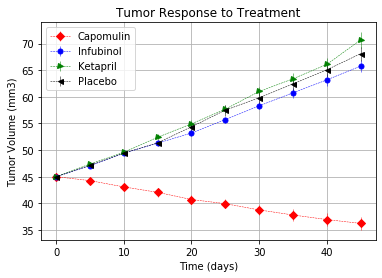

In [11]:
# Generate the Plot (with Error Bars)
#Creating a scatter plot that shows how the tumor volume changes over time for each treatment

plt.errorbar(DataPivot1.index, DataPivot1['Capomulin'], yerr=SError_TumorPivot['Capomulin'],label= 'Capomulin',
             color='r', marker='D', markersize=5, linestyle='--', linewidth=0.5)
plt.errorbar(DataPivot1.index, DataPivot1['Infubinol'], yerr=SError_TumorPivot['Infubinol'],label= 'Infubinol', color='b', marker='o', markersize=5, linestyle='--', linewidth=0.5)
plt.errorbar(DataPivot1.index, DataPivot1['Ketapril'], yerr=SError_TumorPivot['Ketapril'],label= 'Ketapril',color='g', marker='>', markersize=5, linestyle='--', linewidth=0.5)
plt.errorbar(DataPivot1.index, DataPivot1['Placebo'], yerr=SError_TumorPivot['Placebo'],label= 'Placebo',color='k', marker='<', markersize=5, linestyle='--', linewidth=0.5)


#setting plot information in labels
x_lim = len(DataPivot1)
plt.grid()
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc="best")

# Save the Figure
plt.savefig("./TumorResponseToTreatment.png")

In [12]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

MeanMet=MergeData[["Drug","Timepoint","Metastatic Sites"]]

# Convert to DataFrame
MeanMet_DF = pd.DataFrame(MeanMet.groupby(["Drug", "Timepoint"])["Metastatic Sites"].mean())

# Preview DataFrame
MeanMet_DF.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [13]:
 # Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
# Convert to DataFrame
SError_Met=MeanMet.groupby(["Drug", "Timepoint"]).sem()

# Preview DataFrame
SError_Met.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [14]:
#change the format to get the plot
SEerror_MetPivot=pd.pivot_table(SError_Met,index="Timepoint",values="Metastatic Sites",columns="Drug")
SEerror_MetPivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


In [15]:
 # Minor Data Munging to Re-Format the Data Frames
DataPivot2= pd.pivot_table(MergeData, index="Timepoint", values="Metastatic Sites", columns="Drug")

# Preview that Reformatting worked
DataPivot2.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


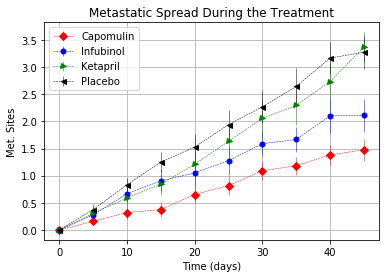

In [16]:
# Generate the Plot (with Error Bars)

plt.errorbar(DataPivot1.index, DataPivot2['Capomulin'], yerr=SEerror_MetPivot['Capomulin'],label= 'Capomulin',color='r', marker='D', markersize=5, linestyle='--', linewidth=0.5)
plt.errorbar(DataPivot1.index, DataPivot2['Infubinol'],yerr=SEerror_MetPivot['Infubinol'],label= 'Infubinol',color='b', marker='o', markersize=5, linestyle='--', linewidth=0.5)
plt.errorbar(DataPivot1.index, DataPivot2['Ketapril'],yerr=SEerror_MetPivot['Ketapril'],label= 'Ketapril', color='g', marker='>', markersize=5, linestyle='--', linewidth=0.5)
plt.errorbar(DataPivot1.index, DataPivot2['Placebo'],yerr=SEerror_MetPivot['Placebo'],label= 'Placebo', color='k', marker='<', markersize=5, linestyle='--', linewidth=0.5)


#Setting data information in labels
x_lim = len(DataPivot2)
plt.grid()
plt.title("Metastatic Spread During the Treatment")
plt.xlabel("Time (days)")
plt.ylabel("Met. Sites")

#showing data labels in plot
plt.legend(loc="best")

# Save the Figure
plt.savefig("./MetastaticSpreadDuringTheTreatment.png")

# Show the Figure
plt.show()

In [17]:
 # Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
Mice=MergeData[["Drug","Timepoint","Mouse ID"]]
# Convert to DataFrame
Mice_Count=pd.DataFrame(Mice.groupby(["Drug", "Timepoint"])["Mouse ID"].count())
# Preview DataFrame
Mice_Count.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [18]:
# Minor Data Munging to Re-Format the Data Frames
Mouse_Count=(Mice.groupby(["Drug", "Timepoint"])["Mouse ID"].count())
Mouse_Count
                   
#Creating data frame 
Tumor_response_DF["Mouse Count"]=Mouse_Count
DataPivotMice = pd.pivot_table(Tumor_response_DF, index="Timepoint", values="Mouse Count", columns="Drug")

# Preview the Data Frame
DataPivotMice.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [19]:
#Showing the information in percentages for Survival Rate
MicePerc=(DataPivotMice*100)/25
MicePerc.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,104.0,100.0,104.0,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,100.0,100.0,100.0,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,92.0,96.0,92.0,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,68.0,96.0,92.0,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,68.0,92.0,84.0,68.0


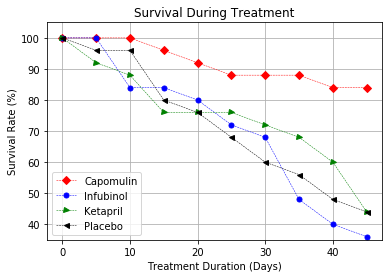

In [20]:
# Generate the Plot (Accounting for percentages)

plt.plot(DataPivotMice.index, MicePerc['Capomulin'], label='Capomulin', color='r', marker='D', markersize=5, linestyle='--', linewidth=0.5)
plt.plot(DataPivotMice.index, MicePerc['Infubinol'],label='Infubinol',color='b', marker='o', markersize=5, linestyle='--', linewidth=0.5)
plt.plot(DataPivotMice.index, MicePerc['Ketapril'], label='Ketapril',color='g', marker='>', markersize=5, linestyle='--', linewidth=0.5)
plt.plot(DataPivotMice.index, MicePerc['Placebo'], label='Placebo',color='k', marker='<', markersize=5, linestyle='--', linewidth=0.5)

plt.ylim(35,105)

# Chart title
plt.title("Survival During Treatment")
# x label
plt.xlabel("Treatment Duration (Days)")
# y label
plt.ylabel("Survival Rate (%)")
# legend 
plt.legend(loc='best')
plt.grid()

# Save the Figure
plt.savefig("./SurvivalRate.png")
# Show the Figure
plt.show()



In [21]:
# Calculate the percent changes for each drug
Tumor_Vol_CHP =  ((DataPivot1.iloc[-1]-DataPivot1.iloc[0])/DataPivot1.iloc[0]) * 100
# Splice the data between passing and failing drugs
Tumor_Vol_CHP.sort_values(ascending=True)
# Display the data to confirm

Drug
Ramicane    -22.320900
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Zoniferol    46.579751
Propriva     47.241175
Placebo      51.297960
Stelasyn     52.085134
Naftisol     53.923347
Ketapril     57.028795
dtype: float64

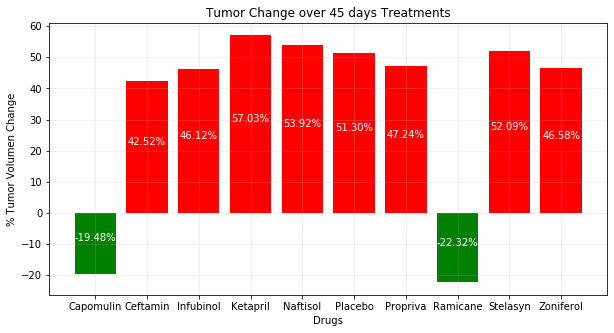

In [22]:
 # Store all Relevant Percent Changes into a Tuple
DrugList = (Tumor_Vol_CHP.index)
PercChanges=(Tumor_Vol_CHP.values)

# Orient widths. Add labels, tick marks, etc. 
plt.figure(figsize=(10,5))
colors = ["red" if PercChanges > 0 else "green" for PercChanges in PercChanges]
plt.bar(DrugList,PercChanges,color=colors)
plt.title("Tumor Change over 45 days Treatments")
plt.xlabel("Drugs")
plt.ylabel("% Tumor Volumen Change")
plt.grid(alpha=0.25)
# Use functions to label the percentages of changes

#Stackoverflow function:
# assign your bars to a variable so their attributes can be accessed
rects = plt.bar(DrugList, height=PercChanges, width=0)
# access the bar attributes to place the text in the appropriate location
for rect in rects:
        height = rect.get_height() # Get the exact height of the bar
        height_formatted = "{:.2f}%".format(rect.get_height())  
        plt.text(rect.get_x() + rect.get_width()/2., 0.5*height, height_formatted, ha='center', va='bottom',color="w")
    

# Save the Figure
plt.savefig("./TumorChange(45daysTratments).png")

# Show the Figure
plt.show()
